## Identifying Types of Board Games with Clustering
<p>CSC570R Data Science Essentials
<p>Melanie Klein
<p>Spring 2017

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

pd.set_option('display.max_columns', None)

In [ ]:
"""
Dataset is a set of features describing 5,000 tabletop and board games
The data was collected by a kaggle user via the API for the website BoardGameGeek.com
The dataset used for this project was obtained from Board Game Geek on April 28, 2017
The data can be found here: https://www.kaggle.com/mrpantherson/board-game-data
"""

In [2]:
df = pd.read_csv("bgg_db_2017_04.csv", encoding='latin1')

### Step One: Exploratory Data Analysis and Data Preparation

In [3]:
#Overview of the dataframe
df.head()

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
0,1,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66801,8.48529,17158,//cf.geekdo-images.com/images/pic2452831.png,13,"Action Point Allowance System, Co-operative Pl...",28156,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8023
1,2,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.74362,8.30836,6835,//cf.geekdo-images.com/images/pic2663291.jpg,14,"Action Point Allowance System, Auction/Bidding...",9269,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3073
2,3,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,180,180,2005,8.35828,8.22111,26972,//cf.geekdo-images.com/images/pic361592.jpg,13,"Area Control / Area Influence, Campaign / Batt...",36707,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5293
3,4,https://boardgamegeek.com/boardgame/120677/ter...,120677,Terra Mystica,2,5,150,60,150,2012,8.29196,8.14967,23588,//cf.geekdo-images.com/images/pic1356616.jpg,12,"Route/Network Building, Variable Phase Order, ...",27265,"Civilization, Economic, Fantasy, Territory Bui...","Jens Drögemüller, Helge Ostertag",3.9381
4,5,https://boardgamegeek.com/boardgame/187645/sta...,187645,Star Wars: Rebellion,2,4,240,180,240,2016,8.54711,8.14500,8093,//cf.geekdo-images.com/images/pic2737530.png,14,"Area Control / Area Influence, Area Movement, ...",13485,"Dice, Fighting, Movies / TV / Radio theme, Sci...",Corey Konieczka,3.5685


In [4]:
#What's the size of the dataset?
df.shape

(4999, 20)

In [5]:
#Check for nulls
df.isnull().values.any()

False

#### Numeric Features

In [6]:
#Summary statistics for numeric features
df.describe()

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.00000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,74530.181036,2.035407,5.280656,105.940988,87.708142,105.577916,1996.236647,6.929740,6.06375,1664.540108,10.276855,2482.274655,2.344336
std,1443.231328,68955.896631,0.675225,15.780946,391.100288,318.163772,391.145875,143.330733,0.566777,0.47905,4024.226523,3.326288,5360.646328,0.803309
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,5.733820,5.62623,38.000000,0.000000,11.000000,0.000000
25%,1250.500000,8134.000000,2.000000,4.000000,30.000000,30.000000,30.000000,2002.000000,6.489465,5.70464,226.000000,8.000000,487.000000,1.731250
50%,2500.000000,42688.000000,2.000000,4.000000,60.000000,45.000000,60.000000,2009.000000,6.876750,5.88036,498.000000,10.000000,953.000000,2.288700
75%,3749.500000,143402.500000,2.000000,6.000000,117.500000,90.000000,100.000000,2013.000000,7.312495,6.26209,1343.500000,12.000000,2219.500000,2.886200
max,4999.000000,220308.000000,8.000000,999.000000,17280.000000,17280.000000,17280.000000,2018.000000,9.343060,8.48529,67571.000000,42.000000,95246.000000,4.904800


In [7]:
#Exploring numeric features
#Exploring rows with extremely high play time values (> 1 day)
df[(df.avg_time > 1440) | (df.min_time > 1440) | (df.max_time > 1440)]

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
806,807,https://boardgamegeek.com/boardgame/1499/world...,1499,World in Flames,2,7,6000,120,6000,1985,7.50205,6.52082,1160,//cf.geekdo-images.com/images/pic2260119.jpg,12,"Area Movement, Dice Rolling, Hex-and-Counter",2159,"Wargame, World War II","Greg Pinder, Harry Rowland",4.6048
831,832,https://boardgamegeek.com/boardgame/254/empire...,254,Empires in Arms,2,7,12000,6000,12000,1983,7.53322,6.50627,1066,//cf.geekdo-images.com/images/pic75368.jpg,14,"Area Movement, Dice Rolling, Secret Unit Deplo...",1782,"Economic, Napoleonic, Negotiation, Political, ...","Greg Pinder, Harry Rowland",4.4309
1290,1291,https://boardgamegeek.com/boardgame/61487/unco...,61487,Unconditional Surrender! World War 2 in Europe,2,3,3000,60,3000,2014,8.34600,6.24445,350,//cf.geekdo-images.com/images/pic1927033.jpg,14,Hex-and-Counter,993,"Wargame, World War II",Salvatore Vasta,3.5781
1376,1377,https://boardgamegeek.com/boardgame/15369/devi...,15369,The Devil's Cauldron: The Battles for Arnhem a...,2,4,2400,90,2400,2008,8.17814,6.21057,370,//cf.geekdo-images.com/images/pic316479.jpg,12,"Chit-Pull System, Dice Rolling, Hex-and-Counter",780,"Wargame, World War II",Adam Starkweather,3.8734
1539,1540,https://boardgamegeek.com/boardgame/5622/pacif...,5622,Pacific War,2,2,6000,60,6000,1985,7.52631,6.14316,477,//cf.geekdo-images.com/images/pic128087.jpg,16,"Dice Rolling, Hex-and-Counter, Simulation",1396,"Nautical, Wargame, World War II",Mark Herman,4.5111
2032,2033,https://boardgamegeek.com/boardgame/13532/gude...,13532,Guderian's Blitzkrieg II,2,2,4500,4500,4500,2001,8.05415,5.98383,231,//cf.geekdo-images.com/images/pic960573.jpg,12,"Dice Rolling, Hex-and-Counter, Simulation",863,"Wargame, World War II",Dean Essig,4.3846
2083,2084,https://boardgamegeek.com/boardgame/32989/axis...,32989,Axis Empires: Totaler Krieg!,1,3,3600,3600,3600,2011,8.43503,5.97068,187,//cf.geekdo-images.com/images/pic1024641.jpg,12,"Campaign / Battle Card Driven, Dice Rolling, H...",547,"Wargame, World War II","Alan Emrich, Thomas Prowell, Salvatore Vasta",4.4048
2160,2161,https://boardgamegeek.com/boardgame/283/advanc...,283,Advanced Third Reich,2,6,2480,2480,2480,1992,6.73416,5.95241,639,//cf.geekdo-images.com/images/pic194375.jpg,12,"Dice Rolling, Hex-and-Counter, Simulation",1342,"Wargame, World War II",Bruce Harper,4.5225
2266,2267,https://boardgamegeek.com/boardgame/5651/longe...,5651,The Longest Day,2,8,5400,5400,5400,1979,7.16986,5.92836,366,//cf.geekdo-images.com/images/pic1451028.png,12,"Co-operative Play, Dice Rolling, Hex-and-Counter",812,"Wargame, World War II",Randall C. Reed,4.1714
2365,2366,https://boardgamegeek.com/boardgame/7614/world...,7614,A World at War,1,8,2880,1440,2880,2003,7.62410,5.90661,251,//cf.geekdo-images.com/images/pic34304.jpg,14,Hex-and-Counter,932,"Wargame, World War II",Bruce Harper,4.8000


In [8]:
#Most of these appear to be war games

In [9]:
#looking for 0 values related to number of players or play time - these are probably missing values
print("min_players: ", df[df.min_players == 0].shape[0])
print("max_players: ", df[df.max_players == 0].shape[0])
print("avg_time: ", df[df.avg_time == 0].shape[0])
print("min_time: ", df[df.min_time == 0].shape[0])
print("max_time: ", df[df.max_time == 0].shape[0])

min_players:  14
max_players:  25
avg_time:  83
min_time:  87
max_time:  121


In [10]:
#How many rows are missing all values related to number of players or play time
df[(df.min_players == 0) & (df.max_players == 0) & (df.avg_time == 0) & (df.min_time == 0) & (df.max_time == 0)]

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
1892,1893,https://boardgamegeek.com/boardgame/18291/unpu...,18291,Unpublished Prototype,0,0,0,0,0,0,7.04804,6.02239,552,//cf.geekdo-images.com/images/pic116113.jpg,0,none,859,none,(Uncredited),2.4000
2245,2246,https://boardgamegeek.com/boardgame/23953/outs...,23953,Outside the Scope of BGG,0,0,0,0,0,0,6.74046,5.93308,503,//cf.geekdo-images.com/images/pic193671.jpg,0,none,1965,Expansion for Base-game,(Uncredited),1.6582
2368,2369,https://boardgamegeek.com/boardgame/21804/trad...,21804,Traditional Card Games,0,0,0,0,0,0,6.51019,5.90577,636,//cf.geekdo-images.com/images/pic111209.jpg,0,none,1013,"Card Game, Game System",(Uncredited),2.0536
3326,3327,https://boardgamegeek.com/boardgame/5985/misce...,5985,Miscellaneous Game Accessory,0,0,0,0,0,0,6.92807,5.75040,207,//cf.geekdo-images.com/images/pic1017967.jpg,0,none,988,none,(Uncredited),3.3333
4043,4044,https://boardgamegeek.com/boardgame/10904/new-...,10904,New Rules for Classic Games,0,0,0,0,0,1992,7.55039,5.68174,87,//cf.geekdo-images.com/images/pic1514261.jpg,10,none,193,"Abstract Strategy, Action / Dexterity, Book, C...",R. Wayne Schmittberger,2.0000


In [11]:
#Dropping these rows as they don't appear to be real games (according to their names)
df = df.drop([1892, 2245, 2368, 3326, 4043])

In [12]:
#Examine games that are missing one or more of these values to decide how to impute
df[(df.min_players == 0) | (df.max_players == 0) | (df.avg_time == 0) | (df.min_time == 0) | (df.max_time == 0)]

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
555,556,https://boardgamegeek.com/boardgame/153016/tel...,153016,Telestrations: 12 Player Party Pack,4,12,0,0,0,2011,7.84996,6.73173,1041,//cf.geekdo-images.com/images/pic2587359.jpg,12,"Line Drawing, Paper-and-Pencil",2170,Party Game,(Uncredited),1.1071
704,705,https://boardgamegeek.com/boardgame/160902/dun...,160902,Dungeons & Dragons Dice Masters: Battle for Fa...,2,2,60,60,0,2015,7.46616,6.59014,1163,//cf.geekdo-images.com/images/pic2391607.jpg,14,"Deck / Pool Building, Dice Rolling, Variable P...",3076,"Collectible Components, Dice, Fantasy, Fighting","Mike Elliott, Eric M. Lang",2.1321
950,951,https://boardgamegeek.com/boardgame/181810/kod...,181810,Kodama: The Tree Spirits,2,5,40,0,40,2016,7.01671,6.42424,1600,//cf.geekdo-images.com/images/pic3291451.jpg,14,"Set Collection, Tile Placement",3515,"Abstract Strategy, Card Game",Daniel Solis,1.5581
992,993,https://boardgamegeek.com/boardgame/177524/ice...,177524,Ice Cool,2,4,20,20,0,2016,6.97602,6.39438,1568,//cf.geekdo-images.com/images/pic2937209.png,6,Acting,2513,"Action / Dexterity, Animals, Children's Game",Brian Gomez,1.0000
1048,1049,https://boardgamegeek.com/boardgame/175307/adv...,175307,Adventure Time Love Letter,2,4,0,0,0,2015,7.37787,6.36510,882,//cf.geekdo-images.com/images/pic2491956.jpg,10,"Hand Management, Player Elimination",2124,"Bluffing, Card Game, Deduction",Seiji Kanai,1.0323
1507,1508,https://boardgamegeek.com/boardgame/198487/sma...,198487,Smash Up: Cease and Desist,2,2,0,0,0,2016,7.77227,6.15784,414,//cf.geekdo-images.com/images/pic3261056.jpg,0,"Area Control / Area Influence, Hand Management...",1973,"Card Game, Fantasy",Paul Peterson,0.0000
1578,1579,https://boardgamegeek.com/boardgame/37301/decktet,37301,Decktet,0,0,30,30,30,2008,7.52266,6.13224,418,//cf.geekdo-images.com/images/pic353574.jpg,0,none,1296,"Card Game, Game System, Print & Play",P. D. Magnus,1.9655
1686,1687,https://boardgamegeek.com/boardgame/162559/sma...,162559,Smash Up: Munchkin,2,4,45,45,0,2015,6.92510,6.08926,703,//cf.geekdo-images.com/images/pic2496426.jpg,12,"Area Control / Area Influence, Hand Management...",2869,"Card Game, Fantasy, Humor",none,2.1667
1735,1736,https://boardgamegeek.com/boardgame/52328/mali...,52328,Malifaux,2,2,0,0,0,2009,7.61989,6.07222,375,//cf.geekdo-images.com/images/pic1451000.jpg,0,"Hand Management, Variable Player Powers",714,"Collectible Components, Horror, Miniatures","Nathan Caroland, Eric Johns, Dan Weber",3.3077
1773,1774,https://boardgamegeek.com/boardgame/205046/cap...,205046,Capital Lux,2,4,30,30,0,2016,7.21443,6.06042,453,//cf.geekdo-images.com/images/pic3121734.jpg,10,"Area Control / Area Influence, Card Drafting, ...",851,"Bluffing, Card Game, Science Fiction","Eilif Svensson, Kristian Amundsen Østby",2.0909


In [13]:
#Use the mode to impute min and max players
min_players_mode = df.min_players.mode()[0]
max_players_mode = df.max_players.mode()[0]

df.min_players = df.min_players.replace(to_replace=0, value=min_players_mode)
df.max_players = df.max_players.replace(to_replace=0, value=max_players_mode)

In [14]:
#Replace zero-value min_time and max_time values with avg_time - this should cover a decent minority of the rows in question
df.min_time = df.min_time.replace(to_replace=0, value=df.avg_time)
df.max_time = df.max_time.replace(to_replace=0, value=df.avg_time)

In [15]:
#Use the mode to impute play times for rows where avg_time is also 0
min_time_mode = df.min_time.mode()[0]
avg_time_mode = df.avg_time.mode()[0]
max_time_mode = df.max_time.mode()[0]

df.min_time = df.min_time.replace(to_replace=0, value=min_time_mode)
df.avg_time = df.avg_time.replace(to_replace=0, value=avg_time_mode)
df.max_time = df.max_time.replace(to_replace=0, value=max_time_mode)

#Confirm there are no more zero-value rows for these features
df[(df.min_players == 0) | (df.max_players == 0) | (df.avg_time == 0) | (df.min_time == 0) | (df.max_time == 0)].shape[0]

0

In [16]:
#Curious about the range of the year feature. I wonder how many games have a year < 0
df[df.year < 0]

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
100,101,https://boardgamegeek.com/boardgame/188/go,188,Go,2,2,180,30,180,-2200,7.67479,7.41536,11503,//cf.geekdo-images.com/images/pic1728832.jpg,8,Area Enclosure,15334,Abstract Strategy,(Uncredited),3.9704
1020,1021,https://boardgamegeek.com/boardgame/2397/backg...,2397,Backgammon,2,2,30,30,30,-3000,6.52651,6.38095,8929,//cf.geekdo-images.com/images/pic55221.jpg,8,"Betting/Wagering, Roll / Spin and Move",12659,"Abstract Strategy, Dice",(Uncredited),2.0315


In [17]:
#Examining rows where age = 0
df[df.age == 0]

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
329,330,https://boardgamegeek.com/boardgame/144189/fir...,144189,Fire in the Lake,1,4,180,180,180,2014,8.08949,6.99353,1343,//cf.geekdo-images.com/images/pic2083738.png,0,"Area Control / Area Influence, Variable Phase ...",3222,"Modern Warfare, Political, Vietnam War, Wargame","Mark Herman, Volko Ruhnke",3.9947
355,356,https://boardgamegeek.com/boardgame/38996/wash...,38996,Washington's War,2,2,90,90,90,2010,7.68162,6.96290,1914,//cf.geekdo-images.com/images/pic655136.jpg,0,"Area Control / Area Influence, Campaign / Batt...",3636,"Age of Reason, American Indian Wars, American ...",Mark Herman,2.8458
451,452,https://boardgamegeek.com/boardgame/111799/cub...,111799,Cuba Libre,1,4,180,180,180,2013,7.80739,6.85756,1344,//cf.geekdo-images.com/images/pic1723711.jpg,0,"Area Control / Area Influence, Area Movement, ...",3023,"Economic, Modern Warfare, Political, Wargame","Jeff Grossman, Volko Ruhnke",3.4420
509,510,https://boardgamegeek.com/boardgame/132018/chu...,132018,Churchill,1,3,300,60,300,2015,7.77257,6.79109,1282,//cf.geekdo-images.com/images/pic2467234.jpg,0,Campaign / Battle Card Driven,2319,"Political, World War II",Mark Herman,3.2357
523,524,https://boardgamegeek.com/boardgame/26990/cont...,26990,Container,3,5,90,90,90,2007,7.11316,6.77679,3565,//cf.geekdo-images.com/images/pic332933.jpg,0,"Auction/Bidding, Commodity Speculation, Pick-u...",2664,"Economic, Industry / Manufacturing, Nautical, ...","Franz-Benno Delonge, Thomas Ewert",3.2500
593,594,https://boardgamegeek.com/boardgame/30618/eat-...,30618,Eat Poop You Cat,3,99,20,20,20,1984,7.47755,6.69007,1374,//cf.geekdo-images.com/images/pic611630.jpg,0,"Line Drawing, Paper-and-Pencil",722,"Humor, Party Game",(Uncredited),1.1238
744,745,https://boardgamegeek.com/boardgame/165722/klask,165722,KLASK,2,2,10,10,10,2014,7.66646,6.56389,946,//cf.geekdo-images.com/images/pic2627444.jpg,0,none,1304,Action / Dexterity,Mikkel Bertelsen,1.0476
752,753,https://boardgamegeek.com/boardgame/173064/lea...,173064,Leaving Earth,1,5,180,60,180,2015,7.99024,6.55874,747,//cf.geekdo-images.com/images/pic2624698.jpg,0,"Pick-up and Deliver, Point to Point Movement, ...",1745,"Science Fiction, Space Exploration",Joseph Fatula,3.4394
820,821,https://boardgamegeek.com/boardgame/146221/for...,146221,Forge War,1,4,180,60,180,2015,7.46664,6.51544,1071,//cf.geekdo-images.com/images/pic2296858.jpg,0,"Grid Movement, Role Playing, Variable Phase Or...",2148,"Adventure, Economic, Fantasy, Industry / Manuf...",Isaac Childres,3.7419
840,841,https://boardgamegeek.com/boardgame/163154/fal...,163154,Falling Sky: The Gallic Revolt Against Caesar,1,4,360,180,360,2016,8.12901,6.50161,597,//cf.geekdo-images.com/images/pic2963551.jpg,0,"Area Control / Area Influence, Area Movement, ...",2010,"Ancient, Wargame","Volko Ruhnke, Andrew Ruhnke",3.9592


In [18]:
#These appear to missing values, too.  Imputing with mode
age_mode = df.age.mode()[0]
df.age = df.age.replace(to_replace=0, value=age_mode)

In [19]:
#Examining rows where weight = 0
#Weight is more or less a measure of the game's complexity and/or difficulty
#Reference: https://boardgamegeek.com/wiki/page/Weight
df[df.weight == 0]

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
1507,1508,https://boardgamegeek.com/boardgame/198487/sma...,198487,Smash Up: Cease and Desist,2,2,60,30,60,2016,7.77227,6.15784,414,//cf.geekdo-images.com/images/pic3261056.jpg,12,"Area Control / Area Influence, Hand Management...",1973,"Card Game, Fantasy",Paul Peterson,0.0
3866,3867,https://boardgamegeek.com/boardgame/199493/esc...,199493,Escape the Room: Secret of Dr. Gravely's Retreat,3,8,90,90,90,2016,7.22349,5.69586,126,//cf.geekdo-images.com/images/pic3015473.jpg,13,"Co-operative Play, Pattern Recognition, Storyt...",324,"Deduction, Murder/Mystery, Party Game, Puzzle","Rebecca Bleau, Nicholas Cravotta",0.0
4576,4577,https://boardgamegeek.com/boardgame/198619/dc-...,198619,DC Comics Dice Masters: Green Arrow and The Flash,2,2,60,30,60,2016,7.83413,5.64821,63,//cf.geekdo-images.com/images/pic3108059.jpg,12,"Deck / Pool Building, Dice Rolling, Variable P...",178,"Collectible Components, Comic Book / Strip, Di...","Mike Elliott, Eric M. Lang",0.0
4643,4644,https://boardgamegeek.com/boardgame/140524/dae...,140524,The Daedalus Sentence,1,4,60,45,60,2016,6.89699,5.64412,133,//cf.geekdo-images.com/images/pic2942209.png,10,"Action Point Allowance System, Co-operative Pl...",304,"Adventure, Science Fiction","Tom Bleys, Ian Van Gemeren, Bart Waeterschoot",0.0
4725,4726,https://boardgamegeek.com/boardgame/197269/gun...,197269,Guns & Steel: Renaissance,2,4,70,40,70,2016,7.38421,5.64001,76,//cf.geekdo-images.com/images/pic3068023.jpg,12,"Deck / Pool Building, Hand Management, Take That",327,"Card Game, Civilization",Jesse Li,0.0
4967,4968,https://boardgamegeek.com/boardgame/206915/tem...,206915,Tempel des Schreckens,3,10,15,15,15,2016,7.01196,5.62762,92,//cf.geekdo-images.com/images/pic3141267.png,8,Partnerships,195,"Bluffing, Card Game, Negotiation",?? ?? (Yusuke Sato),0.0


In [20]:
#These appear to missing values, too.  Imputing with mode
weight_mode = df.weight.mode()[0]
df.weight = df.weight.replace(to_replace=0, value=weight_mode)

#### Histograms for numeric features

Populating the interactive namespace from numpy and matplotlib


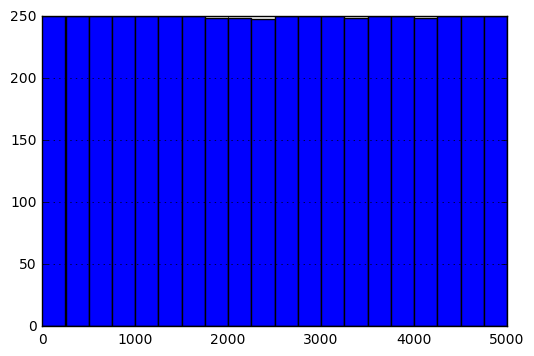

In [21]:
%pylab inline
df["rank"].hist(bins=20)

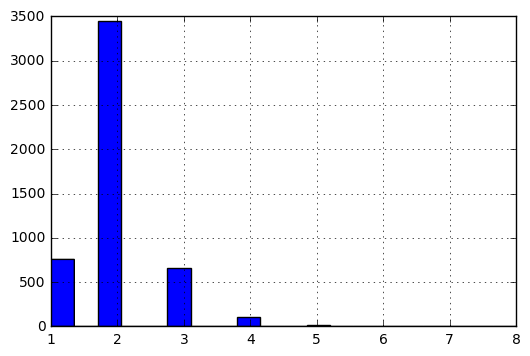

In [22]:
df.min_players.hist(bins=20)

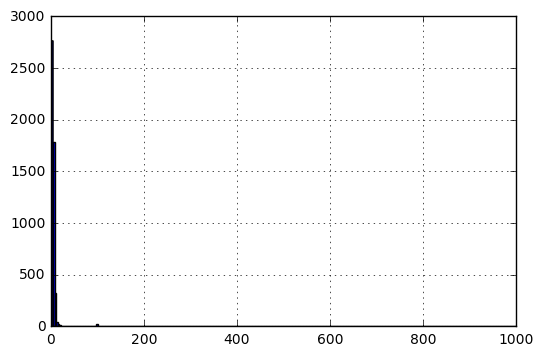

In [23]:
df.max_players.hist(bins=300)

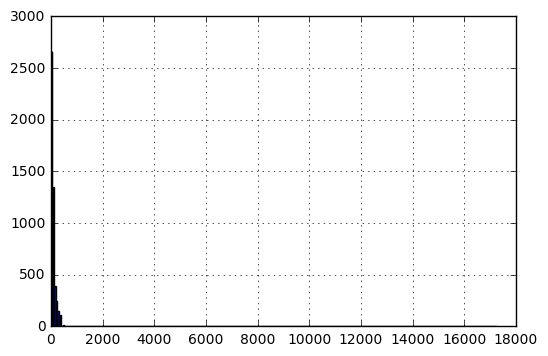

In [24]:
df.min_time.hist(bins=300)

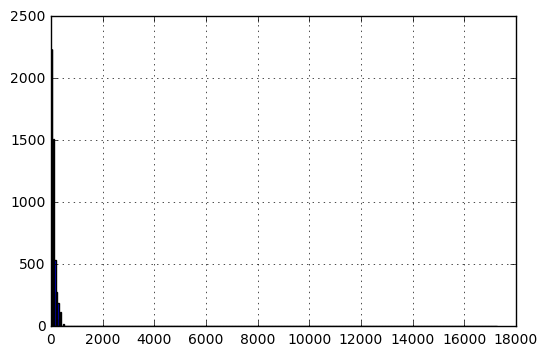

In [25]:
df.avg_time.hist(bins=300)

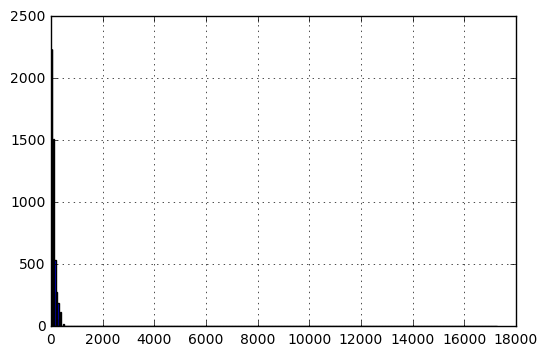

In [26]:
df.max_time.hist(bins=300)

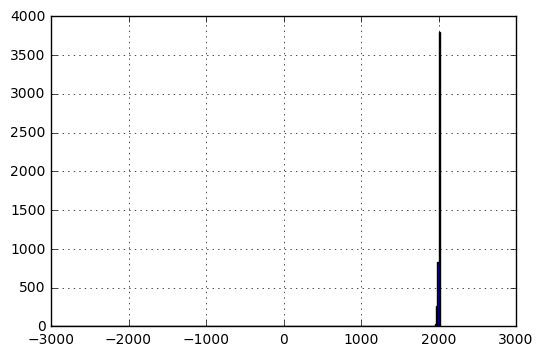

In [27]:
df.year.hist(bins=300)

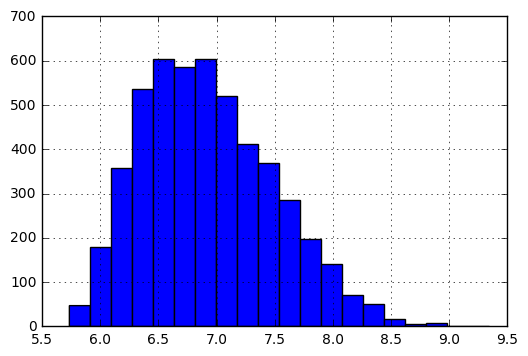

In [28]:
df.avg_rating.hist(bins=20)

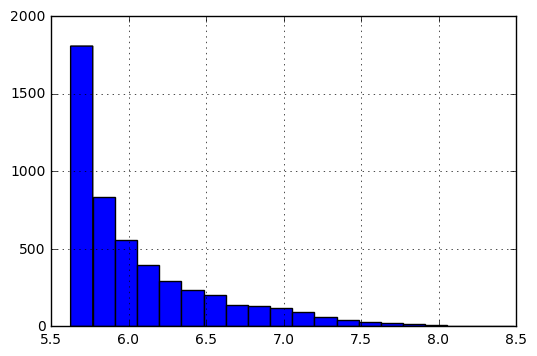

In [29]:
df.geek_rating.hist(bins=20)

In [30]:
#A little background on what the geek rating is about: https://boardgamegeek.com/thread/533543/geek-rating-vs-average-rating
#In short, its purpose is to bring down the ratings of games that haven't been rated by many

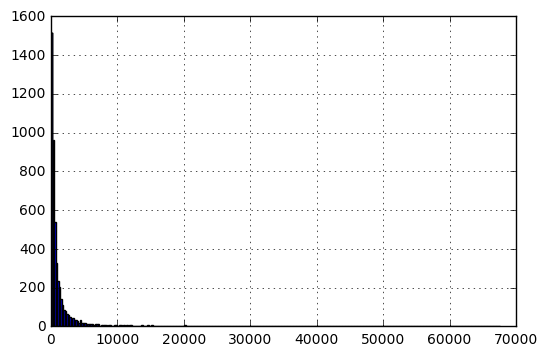

In [31]:
df.num_votes.hist(bins=300)

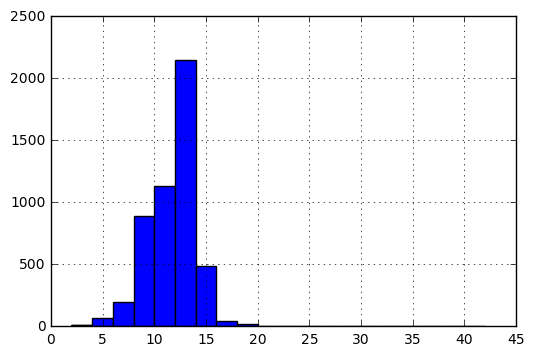

In [32]:
df.age.hist(bins=20)

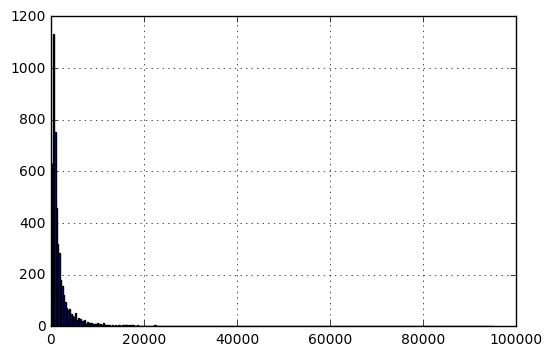

In [33]:
df.owned.hist(bins=300)

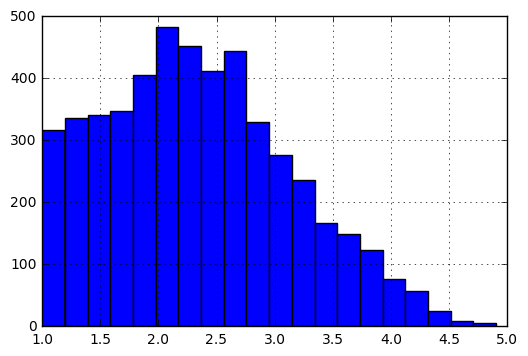

In [34]:
df.weight.hist(bins=20)

#### Categorical Features

In [35]:
#Summary statistics for categorical features
df.describe(include = ['O'])

,bgg_url,names,image_url,mechanic,category,designer
count,4994,4994,4994,4994,4994,4994
unique,4994,4956,4994,2198,2189,2471
top,https://boardgamegeek.com/boardgame/84889/cave...,Cosmic Encounter,//cf.geekdo-images.com/images/pic318862.jpg,none,"Wargame, World War II",Reiner Knizia
freq,1,4,1,184,239,115


In [36]:
#A bit surprised that there are duplicate names - will explore later
#Features mechanic, category, and designer will need some work - these features can contain multiple values, or "none"

In [37]:
#The bgg_url and image_url fields don't seem very useful for clustering purposes, so they can be removed
df = df.drop(['bgg_url', 'image_url'], axis=1)

In [38]:
#Examining duplicate names
df[df.duplicated('names', keep=False)].sort_values(by='names')

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
722,723,492,Aladdin's Dragons,3,5,90,60,90,2000,6.93732,6.57801,2863,10,"Auction/Bidding, Set Collection, Worker Placement",3484,"Arabian, Bluffing, Fantasy, Medieval",Richard Breese,2.4722
4390,4391,53103,Aladdin's Dragons,2,5,30,30,30,2009,6.36929,5.65933,198,10,"Auction/Bidding, Hand Management",488,Card Game,Richard Breese,1.9500
4672,4673,1726,Alexander the Great,2,2,120,120,120,1971,6.09763,5.64236,338,12,"Dice Rolling, Hex-and-Counter, Simulation",919,"Ancient, Wargame","Don Greenwood, Gary Gygax",2.7551
3764,3765,12248,Alexander the Great,2,5,75,75,75,2005,6.10865,5.70318,481,10,Area Control / Area Influence,980,"Ancient, City Building","Ronald Hofstätter, Dietmar Keusch",2.7222
194,195,15987,Arkham Horror,1,8,240,120,240,2005,7.35203,7.18735,30029,12,"Co-operative Play, Dice Rolling, Hand Manageme...",38083,"Adventure, Fantasy, Fighting, Horror, Novel-based","Richard Launius, Kevin Wilson",3.5462
2974,2975,34,Arkham Horror,1,8,180,180,180,1987,6.56510,5.80053,452,12,Co-operative Play,721,"Adventure, Horror, Novel-based","Charlie Krank, Richard Launius, Sandy Petersen...",2.3111
1178,1179,12005,Around the World in 80 Days,2,6,70,50,70,2004,6.58615,6.29851,2680,10,"Card Drafting, Hand Management, Point to Point...",2773,"Novel-based, Racing, Travel",Michael Rieneck,1.8054
4721,4722,204599,Around the World in 80 Days,2,6,60,45,60,2016,6.67654,5.64011,130,10,Hand Management,241,"Adventure, Novel-based, Racing, Transportation",David Parlett,1.5000
1134,1135,98,Axis & Allies,2,5,180,180,180,1981,6.53817,6.32147,8742,12,"Area Movement, Dice Rolling, Partnerships",11634,"Economic, Wargame, World War II","Larry Harris, Jr.",3.0345
933,934,10093,Axis & Allies,2,5,240,240,240,2004,6.72508,6.43324,5246,12,"Area Movement, Dice Rolling, Partnerships",6622,"Economic, Wargame, World War II","Larry Harris, Jr., Mike Selinker",3.2106


In [39]:
#It appears that some duplicate names may be different editions of the same or similar game, 
#while others represent entirely different games

In [40]:
#Exploring categorical features
#looking for missing values
print("Mechanic: ", df[df.mechanic == 'none'].shape[0])
print("Category: ", df[df.category == 'none'].shape[0])
print("Designer: ", df[df.designer == 'none'].shape[0])
print("Mechanic and Category: ", df[(df.mechanic == 'none') & (df.category == 'none')].shape[0])
print("Category and Designer: ", df[(df.category == 'none') & (df.designer == 'none')].shape[0])
print("Mechanic and Designer: ", df[(df.mechanic == 'none') & (df.designer == 'none')].shape[0])
print("All three: ", df[(df.mechanic == 'none') & (df.category == 'none') & (df.designer == 'none')].shape[0])

Mechanic:  184
Category:  36
Designer:  35
Mechanic and Category:  0
Category and Designer:  0
Mechanic and Designer:  3
All three:  0


In [41]:
#Based on my domain knowledge of board games, I feel that these three features are very important for meaningful clustering
#Since the records with missing values make up only about 5% of our 4,999 row dataset, I'm just going to remove them
##Note: rows missing designer are not being removed at this time.  later on the reason for this will become evident
df = df[(df.mechanic != 'none') & (df.category != 'none')]

In [42]:
#Checking that the expected number of rows were removed
df.shape

(4774, 18)

In [43]:
#get a unique list of values for mechanic
import itertools
#Get a flattened list of possible values for mechanic
mechanics = list(itertools.chain.from_iterable(df.mechanic.str.split(', ')))
#Eliminate duplicates
unique_mechanics = list(set(mechanics))
#Sort in alphabetical order
unique_mechanics.sort()

In [44]:
len(unique_mechanics)

51

In [45]:
unique_mechanics

['Acting',
 'Action / Movement Programming',
 'Action Point Allowance System',
 'Area Control / Area Influence',
 'Area Enclosure',
 'Area Movement',
 'Area-Impulse',
 'Auction/Bidding',
 'Betting/Wagering',
 'Campaign / Battle Card Driven',
 'Card Drafting',
 'Chit-Pull System',
 'Co-operative Play',
 'Commodity Speculation',
 'Crayon Rail System',
 'Deck / Pool Building',
 'Dice Rolling',
 'Grid Movement',
 'Hand Management',
 'Hex-and-Counter',
 'Line Drawing',
 'Memory',
 'Modular Board',
 'Paper-and-Pencil',
 'Partnerships',
 'Pattern Building',
 'Pattern Recognition',
 'Pick-up and Deliver',
 'Player Elimination',
 'Point to Point Movement',
 'Press Your Luck',
 'Rock-Paper-Scissors',
 'Role Playing',
 'Roll / Spin and Move',
 'Route/Network Building',
 'Secret Unit Deployment',
 'Set Collection',
 'Simulation',
 'Simultaneous Action Selection',
 'Singing',
 'Stock Holding',
 'Storytelling',
 'Take That',
 'Tile Placement',
 'Time Track',
 'Trading',
 'Trick-taking',
 'Variable P

In [46]:
#repeat for category
categories = list(itertools.chain.from_iterable(df.category.str.split(', ')))
unique_categories = list(set(categories))
unique_categories.sort()

In [47]:
len(unique_categories)

83

In [48]:
unique_categories

['Abstract Strategy',
 'Action / Dexterity',
 'Adventure',
 'Age of Reason',
 'American Civil War',
 'American Indian Wars',
 'American Revolutionary War',
 'American West',
 'Ancient',
 'Animals',
 'Arabian',
 'Aviation / Flight',
 'Bluffing',
 'Book',
 'Card Game',
 "Children's Game",
 'City Building',
 'Civil War',
 'Civilization',
 'Collectible Components',
 'Comic Book / Strip',
 'Deduction',
 'Dice',
 'Economic',
 'Educational',
 'Electronic',
 'Environmental',
 'Expansion for Base-game',
 'Exploration',
 'Fantasy',
 'Farming',
 'Fighting',
 'Game System',
 'Horror',
 'Humor',
 'Industry / Manufacturing',
 'Korean War',
 'Mafia',
 'Math',
 'Mature / Adult',
 'Maze',
 'Medical',
 'Medieval',
 'Memory',
 'Miniatures',
 'Modern Warfare',
 'Movies / TV / Radio theme',
 'Murder/Mystery',
 'Music',
 'Mythology',
 'Napoleonic',
 'Nautical',
 'Negotiation',
 'Novel-based',
 'Number',
 'Party Game',
 'Pike and Shot',
 'Pirates',
 'Political',
 'Post-Napoleonic',
 'Prehistoric',
 'Print & 

In [49]:
#There are a lot of war related categories. For simplicity's sake, I am going to eliminate them and replace with just "War"
unique_categories = [x for x in unique_categories if " War" not in x]
unique_categories[71] = "War"

In [50]:
len(unique_categories)

74

In [51]:
unique_categories

['Abstract Strategy',
 'Action / Dexterity',
 'Adventure',
 'Age of Reason',
 'American West',
 'Ancient',
 'Animals',
 'Arabian',
 'Aviation / Flight',
 'Bluffing',
 'Book',
 'Card Game',
 "Children's Game",
 'City Building',
 'Civilization',
 'Collectible Components',
 'Comic Book / Strip',
 'Deduction',
 'Dice',
 'Economic',
 'Educational',
 'Electronic',
 'Environmental',
 'Expansion for Base-game',
 'Exploration',
 'Fantasy',
 'Farming',
 'Fighting',
 'Game System',
 'Horror',
 'Humor',
 'Industry / Manufacturing',
 'Mafia',
 'Math',
 'Mature / Adult',
 'Maze',
 'Medical',
 'Medieval',
 'Memory',
 'Miniatures',
 'Movies / TV / Radio theme',
 'Murder/Mystery',
 'Music',
 'Mythology',
 'Napoleonic',
 'Nautical',
 'Negotiation',
 'Novel-based',
 'Number',
 'Party Game',
 'Pike and Shot',
 'Pirates',
 'Political',
 'Post-Napoleonic',
 'Prehistoric',
 'Print & Play',
 'Puzzle',
 'Racing',
 'Real-time',
 'Religious',
 'Renaissance',
 'Science Fiction',
 'Space Exploration',
 'Spies/Secr

In [52]:
#repeat for designer
designers = list(itertools.chain.from_iterable(df.designer.str.split(', ')))
unique_designers = list(set(designers))
unique_designers.sort()

In [53]:
len(unique_designers)

2707

In [54]:
unique_designers

['(Uncredited)',
 '?? ?? (Hinata Origuchi)',
 '?? ?? (Shingo Fujita)',
 '?? ?? (Yusuke Sato)',
 '???? (Motoyuki Ohki)',
 '?ukasz M. Pogoda',
 '?ukasz S. Kowal',
 '?ukasz Wo?niak',
 'A. J. Porfirio',
 'Aamir Syed',
 'Aaron Brosman',
 'Aaron Darland',
 'Aaron Dill',
 'Aaron Forsythe',
 'Aaron Haag',
 'Aaron Lauster',
 'Aaron Weissblum',
 'Abe Nathanson',
 'Acchittocca',
 'Adam Carlson',
 'Adam E. Daulton',
 'Adam Gertzbein',
 'Adam Ka?u?a',
 'Adam Kwapi?ski',
 'Adam Mnich',
 'Adam P. McIver',
 'Adam Poots',
 'Adam Rebottaro',
 'Adam Sadler',
 'Adam Sblendorio',
 'Adam Starkweather',
 'Adam Troke',
 'Adam West',
 'Adrian Abela',
 'Adrian Adamescu',
 'Adrian Dinu',
 'Adrian Smith',
 'Adrián Ferreiro',
 'Agnieszka Kopera',
 'Agnès Largeaud',
 'Akihiro Itoh',
 'Akihisa Okui',
 'Al Newman',
 'Al Rose',
 'Al Sandrick',
 'Alain Epron',
 'Alain Ollier',
 'Alain Orban',
 'Alain Padfield',
 'Alain Rivollet',
 'Alan Coleman',
 'Alan D. Ernstein',
 'Alan Emrich',
 'Alan Gerding',
 'Alan J. Ray',
 'A

In [55]:
#Wow!  That is a lot of designers.  With that many different possible values for designer,
#I'm doubting this feature is going to be useful for clustering, so I'll remove it
##Note: this is why we didn't bother removing rows with designer == 'none'
df = df.drop(['designer'], axis=1)

In [56]:
#Dummy coding for mechanic feature
for x in unique_mechanics:
    df['Mechanic: ' + x] = df.mechanic.str.contains(x).astype(int)

In [57]:
#Dummy coding for category feature
for x in unique_categories:
    df['Category: ' + x] = df.category.str.contains(x).astype(int)

In [58]:
#Drop original categorical features
df = df.drop(['mechanic', 'category'], axis=1)

In [59]:
df.head()

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight,Mechanic: Acting,Mechanic: Action / Movement Programming,Mechanic: Action Point Allowance System,Mechanic: Area Control / Area Influence,Mechanic: Area Enclosure,Mechanic: Area Movement,Mechanic: Area-Impulse,Mechanic: Auction/Bidding,Mechanic: Betting/Wagering,Mechanic: Campaign / Battle Card Driven,Mechanic: Card Drafting,Mechanic: Chit-Pull System,Mechanic: Co-operative Play,Mechanic: Commodity Speculation,Mechanic: Crayon Rail System,Mechanic: Deck / Pool Building,Mechanic: Dice Rolling,Mechanic: Grid Movement,Mechanic: Hand Management,Mechanic: Hex-and-Counter,Mechanic: Line Drawing,Mechanic: Memory,Mechanic: Modular Board,Mechanic: Paper-and-Pencil,Mechanic: Partnerships,Mechanic: Pattern Building,Mechanic: Pattern Recognition,Mechanic: Pick-up and Deliver,Mechanic: Player Elimination,Mechanic: Point to Point Movement,Mechanic: Press Your Luck,Mechanic: Rock-Paper-Scissors,Mechanic: Role Playing,Mechanic: Roll / Spin and Move,Mechanic: Route/Network Building,Mechanic: Secret Unit Deployment,Mechanic: Set Collection,Mechanic: Simulation,Mechanic: Simultaneous Action Selection,Mechanic: Singing,Mechanic: Stock Holding,Mechanic: Storytelling,Mechanic: Take That,Mechanic: Tile Placement,Mechanic: Time Track,Mechanic: Trading,Mechanic: Trick-taking,Mechanic: Variable Phase Order,Mechanic: Variable Player Powers,Mechanic: Voting,Mechanic: Worker Placement,Category: Abstract Strategy,Category: Action / Dexterity,Category: Adventure,Category: Age of Reason,Category: American West,Category: Ancient,Category: Animals,Category: Arabian,Category: Aviation / Flight,Category: Bluffing,Category: Book,Category: Card Game,Category: Children's Game,Category: City Building,Category: Civilization,Category: Collectible Components,Category: Comic Book / Strip,Category: Deduction,Category: Dice,Category: Economic,Category: Educational,Category: Electronic,Category: Environmental,Category: Expansion for Base-game,Category: Exploration,Category: Fantasy,Category: Farming,Category: Fighting,Category: Game System,Category: Horror,Category: Humor,Category: Industry / Manufacturing,Category: Mafia,Category: Math,Category: Mature / Adult,Category: Maze,Category: Medical,Category: Medieval,Category: Memory,Category: Miniatures,Category: Movies / TV / Radio theme,Category: Murder/Mystery,Category: Music,Category: Mythology,Category: Napoleonic,Category: Nautical,Category: Negotiation,Category: Novel-based,Category: Number,Category: Party Game,Category: Pike and Shot,Category: Pirates,Category: Political,Category: Post-Napoleonic,Category: Prehistoric,Category: Print & Play,Category: Puzzle,Category: Racing,Category: Real-time,Category: Religious,Category: Renaissance,Category: Science Fiction,Category: Space Exploration,Category: Spies/Secret Agents,Category: Sports,Category: Territory Building,Category: Trains,Category: Transportation,Category: Travel,Category: Trivia,Category: Video Game Theme,Category: War,Category: Word Game,Category: Zombies
0,1,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66801,8.48529,17158,13,28156,2.8023,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.74362,8.30836,6835,14,9269,4.3073,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,12333,Twilight Struggle,2,2,180,180,180,2005,8.35828,8.22111,26972,13,36707,3.5293,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [60]:
df.shape

(4774, 140)

##### Bar Charts for Categorical Features

In [61]:
mechanics_array = np.empty((0,1), int)
for col in unique_mechanics:
    mechanics_array = np.append(mechanics_array, np.array([[df.loc[df["Mechanic: " + col] == 1].shape[0]]]), axis=0)

mechanics_df = pd.DataFrame(columns=['count'], index=unique_mechanics, data=mechanics_array)
mechanics_df = mechanics_df.sort_values(by="count")

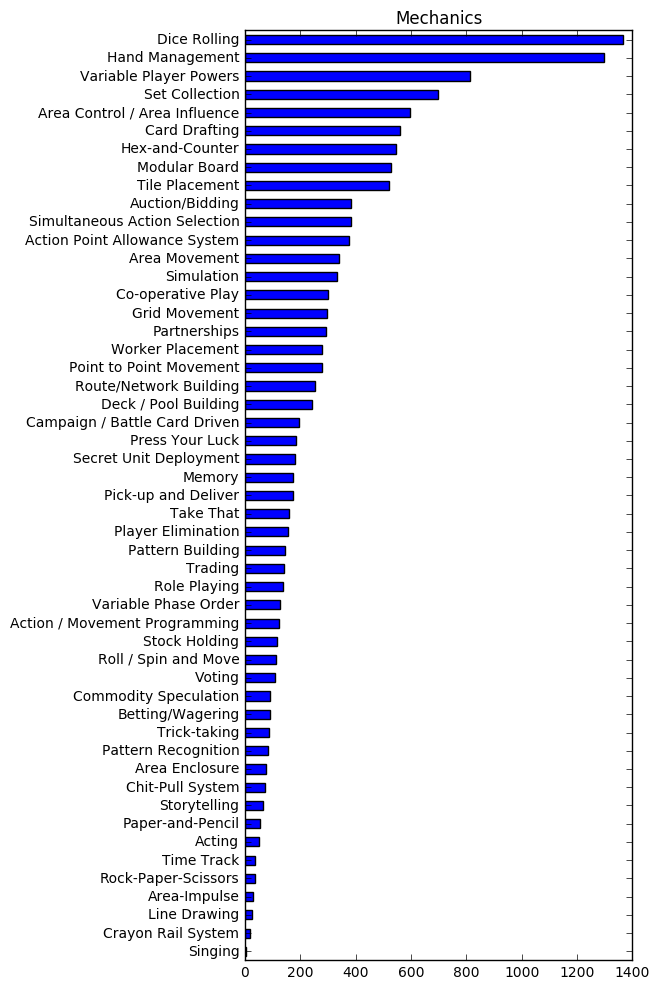

In [62]:
mechanics_df["count"].plot(kind='barh', title="Mechanics", figsize=(5,12))

In [63]:
categories_array = np.empty((0,1), int)
for col in unique_categories:
    categories_array = np.append(categories_array, np.array([[df.loc[df["Category: " + col] == 1].shape[0]]]), axis=0)

categories_df = pd.DataFrame(columns=['count'], index=unique_categories, data=categories_array)
categories_df = categories_df.sort_values(by="count")

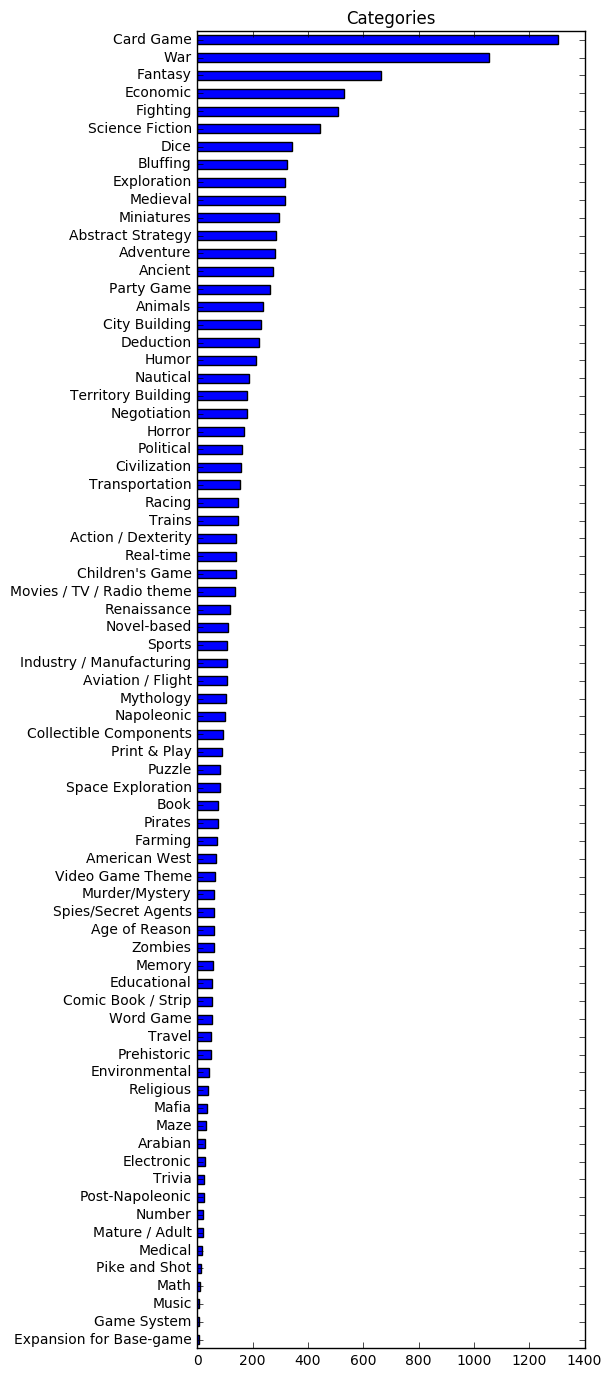

In [64]:
categories_df["count"].plot(kind='barh', title="Categories", figsize=(5,17))

#### Final Data Prep

In [65]:
#Remove game_id and names features - store in a separate dataframe for later use
lookup_df = df[["game_id", "names"]]
df = df.drop(["game_id", "names"], axis=1)

### Part Two: K-Means Clustering

In [69]:
def find_k (X, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    Function by Mike Bernico
    """
    import matplotlib.pyplot as plt
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]

    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1, random_state=42).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])

    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

In [70]:
#Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

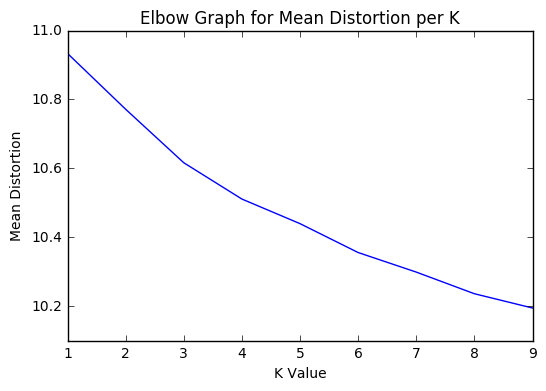

In [71]:
#find the best value for K
find_k(np.matrix(df_scaled), range(1,10,1))

In [72]:
#Well, there isn't much of an elbow.  Let's go with 3, as it's the closest to an elbow
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(df_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [73]:
df['labels'] = kmeans_model.labels_

In [74]:
lookup_df['labels'] = kmeans_model.labels_
lookup_df['labels'].value_counts()

1    2274
2    1396
0    1104
Name: labels, dtype: int64

In [75]:
df[df['labels'] == 0].mean().sort_values(ascending=False)[0:20]

owned                                      4653.634058
num_votes                                  3547.728261
year                                       2004.067029
rank                                       1586.961957
avg_time                                     99.884058
max_time                                     99.748188
min_time                                     82.992754
age                                          11.610507
avg_rating                                    7.100107
geek_rating                                   6.398171
max_players                                   4.614130
weight                                        2.817429
min_players                                   2.109601
Category: Economic                            0.418478
Mechanic: Area Control / Area Influence       0.314312
Mechanic: Hand Management                     0.270833
Mechanic: Tile Placement                      0.237319
Mechanic: Set Collection                      0.234601
Mechanic: 

In [76]:
df[df['labels'] == 1].mean().sort_values(ascending=False)[0:20]

rank                         2749.673263
owned                        2015.800792
year                         1992.087951
num_votes                    1288.377748
avg_time                       40.765611
max_time                       40.765611
min_time                       35.997361
age                             9.906772
avg_rating                      6.665170
geek_rating                     5.956602
max_players                     5.877309
min_players                     2.184697
weight                          1.805637
labels                          1.000000
Category: Card Game             0.480211
Mechanic: Hand Management       0.365875
Mechanic: Set Collection        0.186456
Mechanic: Dice Rolling          0.166227
Category: Fantasy               0.145119
Mechanic: Card Drafting         0.124450
dtype: float64

In [77]:
df[df['labels'] == 2].mean().sort_values(ascending=False)[0:20]

rank                                2678.861748
year                                2002.991404
owned                               1782.219914
num_votes                            971.992120
avg_time                             230.103868
max_time                             230.103868
min_time                             185.207736
age                                   12.149713
avg_rating                             7.266851
geek_rating                            6.013504
max_players                            4.123209
weight                                 2.945897
labels                                 2.000000
min_players                            1.737822
Category: War                          0.703438
Mechanic: Dice Rolling                 0.580229
Mechanic: Hex-and-Counter              0.388252
Mechanic: Variable Player Powers       0.274355
Category: Miniatures                   0.199140
Mechanic: Simulation                   0.189828
dtype: float64

In [151]:
"""
These results look promising.  In the world of tabletop gaming, games are often labeled as "Euros" or "Ameritrash".

Euros are games that focus more on game mechanic than on any kind of theme or story.  Many have economic elements to them.
The first group looks like a good contender for the "Euros" game type.

Ameritrash, or American style board games, are more theme, story, or character driven games.
The third group looks like a good contender for the "Ameritrash" game type.

Our additional category appears to be for card games.  This makes sense to me as an additional category to consider,
as not all games fit easily under the Euro and Ameritrash labels.

Let's see how our results match up against Board Game Geek's examples of Euros and Ameritrash:

"""
#Euro games should fall into label 0
#Resource: https://boardgamegeek.com/wiki/page/Eurogame#
print("Euro style boardgames:")
print("Puerto Rico: ", lookup_df[lookup_df['names'] == "Puerto Rico"].get_values()[0,2])
print("Carcassonne: ", lookup_df[lookup_df['names'] == "Carcassonne"].get_values()[0,2])
print("Tigris & Euphrates: ", lookup_df[lookup_df['names'] == "Tigris & Euphrates"].get_values()[0,2])
print("Caylus: ", lookup_df[lookup_df['names'] == "Caylus"].get_values()[0,2])
print("Power Grid: ", lookup_df[lookup_df['names'] == "Power Grid"].get_values()[0,2])

#Ameritrash games should fall into label 2
#Resource: https://boardgamegeek.com/wiki/page/Ameritrash
print("\nAmerican style boardgames:")
print("Runewars: ", lookup_df[lookup_df['names'] == "Runewars"].get_values()[0,2])
print("Arkham Horror: ", lookup_df[lookup_df['names'] == "Arkham Horror"].get_values()[0,2])
print("Battlestar Galactica: ", lookup_df[lookup_df['names'] == "Battlestar Galactica"].get_values()[0,2])
print("Dune: ", lookup_df[lookup_df['names'] == "Dune"].get_values()[0,2])
print("Axis & Allies: ", lookup_df[lookup_df['names'] == "Axis & Allies"].get_values()[0,2])
print("Cosmic Encounter: ", lookup_df[lookup_df['names'] == "Cosmic Encounter"].get_values()[0,2])
print("Twilight Imperium: ", lookup_df[lookup_df['names'] == "Twilight Imperium"].get_values()[0,2])
print("Tales of the Arabian Nights: ", lookup_df[lookup_df['names'] == "Tales of the Arabian Nights"].get_values()[0,2])



Euro style boardgames:
Puerto Rico:  0
Carcassonne:  0
Tigris & Euphrates:  0
Caylus:  0
Power Grid:  0

American style boardgames:
Runewars:  2
Arkham Horror:  2
Battlestar Galactica:  0
Dune:  0
Axis & Allies:  2
Cosmic Encounter:  0
Twilight Imperium:  2
Tales of the Arabian Nights:  2


In [165]:
"""
These results aren't bad.

However, I think we can do better.  We have a few games which are commonly considered "Ameritrash", but have been
clustered into our first group here.

Additionally, I can think of quite a few games I have played that wouldn't readily fit into any of our 3 clusters.

I'm going to reduce our dataset down to the top 10% of the dataset - these are games that are well received,
have good documentation on BGG (meaning their data on play time, number of players, categories, mechanics, etc.
is likely more accurate and thorough).
Additionally, I feel that the top 10% of games are solid games and thus have strong identities - they set out
to fill a certain space in the board gaming universe and they achieve it.  In terms of identity, some of the
games at the bottom of our list (rank and popularity wise) may be lacking and thus creating a lot of noise in our clustering.

I also am going to remove some columns which I think are either not useful, or are redundant (for example, we
could probably do without min and max play time since we have avg play time).
"""

'\nThese results aren\'t bad.\n\nHowever, I think we can do better.  We have a few games which are commonly considered "Ameritrash", but have been\nclustered into our first group here.\n\nAdditionally, I can think of quite a few games I have played that wouldn\'t readily fit into any of our 3 clusters.\n\nI\'m going to reduce our dataset down to the top 10% of the dataset - these are games that are well received,\nhave good documentation on BGG (meaning their data on play time, number of players, categories, mechanics, etc.\nis likely more accurate and thorough).\nAdditionally, I feel that the top 10% of games are solid games and thus have strong identities - they set out\nto fill a certain space in the board gaming universe and they achieve it.  In terms of identity, some of the\ngames at the bottom of our list (rank and popularity wise) may be lacking and thus creating a lot of noise in our clustering.\n\nI also am going to remove some columns which I think are either not useful, or 

In [204]:
#Create a new, smaller dataset to work with

#Trim rows
df_two = df[df['rank'] < 501]
#Trim columns
df_two = df_two.drop(['geek_rating', 'num_votes', 'min_players', 'min_time', 'max_time', 'labels'], axis=1)

In [205]:
df_two.shape

(498, 133)

In [206]:
#Create new lookup tables
lookup_df_two = lookup_df[0:498]
lookup_df_two = lookup_df_two.drop(['labels'], axis=1)

In [207]:
lookup_df_two.shape

(498, 2)

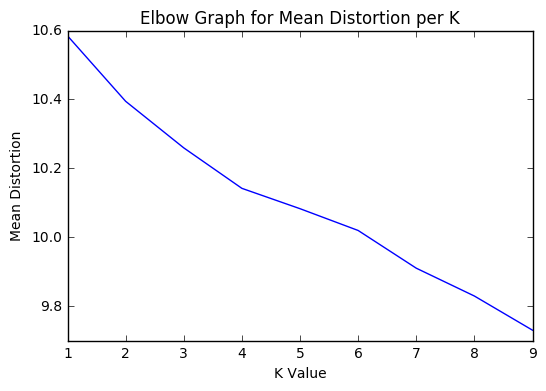

In [208]:
#Find a good k
df_two_scaled = scaler.fit_transform(df_two)
find_k(np.matrix(df_two_scaled), range(1,10,1))

In [209]:
#4 looks like a decent elbow - let's try it
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(df_two_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [210]:
df_two['labels'] = kmeans_model.labels_
lookup_df_two['labels'] = kmeans_model.labels_
lookup_df_two['labels'].value_counts()

1    184
0    150
2    138
3     26
Name: labels, dtype: int64

In [211]:
df_two[df_two['labels'] == 0].mean().sort_values(ascending=False)[0:20]

owned                                      13744.053333
year                                        2008.946667
rank                                         296.180000
avg_time                                      53.866667
age                                           11.026667
avg_rating                                     7.447132
max_players                                    4.433333
weight                                         2.302959
Mechanic: Hand Management                      0.666667
Category: Card Game                            0.640000
Mechanic: Set Collection                       0.353333
Mechanic: Card Drafting                        0.313333
Mechanic: Variable Player Powers               0.273333
Category: Fantasy                              0.240000
Mechanic: Deck / Pool Building                 0.220000
Mechanic: Dice Rolling                         0.186667
Category: Fighting                             0.186667
Category: Science Fiction                      0

In [212]:
df_two[df_two['labels'] == 1].mean().sort_values(ascending=False)[0:20]

owned                                      10353.375000
year                                        1982.766304
rank                                         225.478261
avg_time                                     107.201087
age                                           11.554348
avg_rating                                     7.597865
max_players                                    4.413043
weight                                         3.087597
labels                                         1.000000
Category: Economic                             0.532609
Mechanic: Worker Placement                     0.336957
Mechanic: Tile Placement                       0.326087
Mechanic: Area Control / Area Influence        0.304348
Mechanic: Card Drafting                        0.293478
Mechanic: Hand Management                      0.277174
Mechanic: Set Collection                       0.260870
Mechanic: Auction/Bidding                      0.206522
Category: City Building                        0

In [213]:
df_two[df_two['labels'] == 2].mean().sort_values(ascending=False)[0:20]

owned                               10282.210145
year                                 2008.391304
rank                                  233.811594
avg_time                              145.398551
age                                    12.384058
avg_rating                              7.711422
max_players                             4.094203
weight                                  3.058586
labels                                  2.000000
Mechanic: Dice Rolling                  0.760870
Mechanic: Variable Player Powers        0.666667
Category: Fighting                      0.442029
Category: War                           0.427536
Mechanic: Hand Management               0.405797
Mechanic: Modular Board                 0.398551
Category: Fantasy                       0.362319
Category: Adventure                     0.347826
Category: Miniatures                    0.340580
Mechanic: Area Movement                 0.282609
Mechanic: Co-operative Play             0.260870
dtype: float64

In [214]:
df_two[df_two['labels'] == 3].mean().sort_values(ascending=False)[0:20]

owned                                      16008.423077
year                                        2009.846154
rank                                         246.807692
avg_time                                      41.615385
age                                           10.576923
max_players                                    8.846154
avg_rating                                     7.426405
labels                                         3.000000
weight                                         1.591908
Category: Party Game                           0.884615
Category: Deduction                            0.615385
Category: Bluffing                             0.500000
Mechanic: Partnerships                         0.500000
Mechanic: Voting                               0.346154
Category: Card Game                            0.346154
Category: Humor                                0.346154
Mechanic: Memory                               0.307692
Mechanic: Variable Player Powers               0

In [223]:
"""
Interesting!  We have found one extra group: party games/social games.

Let's see how our games match up to BGG now:
"""
#Euro games should fall into label 1
#Resource: https://boardgamegeek.com/wiki/page/Eurogame#
print("Euro style boardgames:")
print("Puerto Rico: ", lookup_df_two[lookup_df_two['names'] == "Puerto Rico"].get_values()[0,2])
print("Carcassonne: ", lookup_df_two[lookup_df_two['names'] == "Carcassonne"].get_values()[0,2])
print("Tigris & Euphrates: ", lookup_df_two[lookup_df_two['names'] == "Tigris & Euphrates"].get_values()[0,2])
print("Caylus: ", lookup_df_two[lookup_df_two['names'] == "Caylus"].get_values()[0,2])
print("Power Grid: ", lookup_df_two[lookup_df_two['names'] == "Power Grid"].get_values()[0,2])

#Ameritrash games should fall into label 2
#Resource: https://boardgamegeek.com/wiki/page/Ameritrash
#Two games which did not make the top 500 have been commented out
print("\nAmerican style boardgames:")
print("Runewars: ", lookup_df_two[lookup_df_two['names'] == "Runewars"].get_values()[0,2])
print("Arkham Horror: ", lookup_df_two[lookup_df_two['names'] == "Arkham Horror"].get_values()[0,2])
print("Battlestar Galactica: ", lookup_df_two[lookup_df_two['names'] == "Battlestar Galactica"].get_values()[0,2])
print("Dune: ", lookup_df_two[lookup_df_two['names'] == "Dune"].get_values()[0,2])
#print("Axis & Allies: ", lookup_df_two[lookup_df_two['names'] == "Axis & Allies"].get_values()[0,2])
print("Cosmic Encounter: ", lookup_df_two[lookup_df_two['names'] == "Cosmic Encounter"].get_values()[0,2])
#print("Twilight Imperium: ", lookup_df_two[lookup_df_two['names'] == "Twilight Imperium"].get_values()[0,2])
print("Tales of the Arabian Nights: ", lookup_df_two[lookup_df_two['names'] == "Tales of the Arabian Nights"].get_values()[0,2])

Euro style boardgames:
Puerto Rico:  1
Carcassonne:  1
Tigris & Euphrates:  1
Caylus:  1
Power Grid:  1

American style boardgames:
Runewars:  2
Arkham Horror:  2
Battlestar Galactica:  2
Dune:  2
Cosmic Encounter:  2
Tales of the Arabian Nights:  2


In [224]:
#And for curiosity's sake, let's look at some of the card games:
lookup_df_two[lookup_df_two['labels'] == 0]

,game_id,names,labels
0,161936,Pandemic Legacy: Season 1,0
7,173346,7 Wonders Duel,0
22,124742,Android: Netrunner,0
35,68448,7 Wonders,0
44,28143,Race for the Galaxy,0
46,157354,Five Tribes,0
49,40834,Dominion: Intrigue,0
53,36218,Dominion,0
58,30549,Pandemic,0
62,521,Crokinole,0


In [225]:
#And the party/social games:
lookup_df_two[lookup_df_two['labels'] == 3]

,game_id,names,labels
27,178900,Codenames,3
54,2511,Sherlock Holmes Consulting Detective: The Tham...,3
66,128882,The Resistance: Avalon,3
123,181304,Mysterium,3
131,41114,The Resistance,3
132,92828,Dixit Odyssey,3
156,39856,Dixit,3
157,59959,Letters from Whitechapel,3
165,198773,Codenames: Pictures,3
184,157969,Sheriff of Nottingham,3
